<a href="https://colab.research.google.com/github/Namanakushal/Power-System-Load-Type-Prediction/blob/main/userready_assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

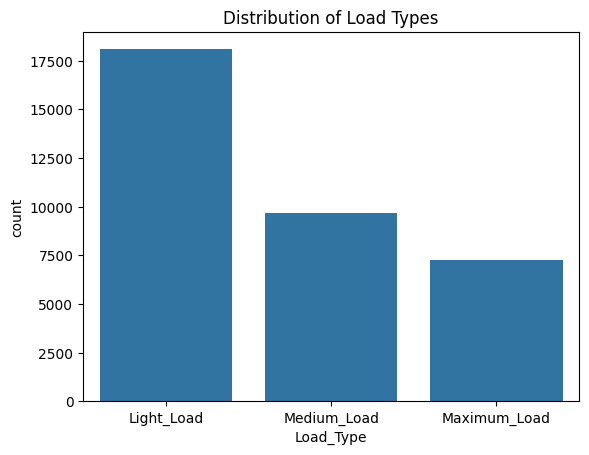

<ipython-input-16-443041e4e525>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


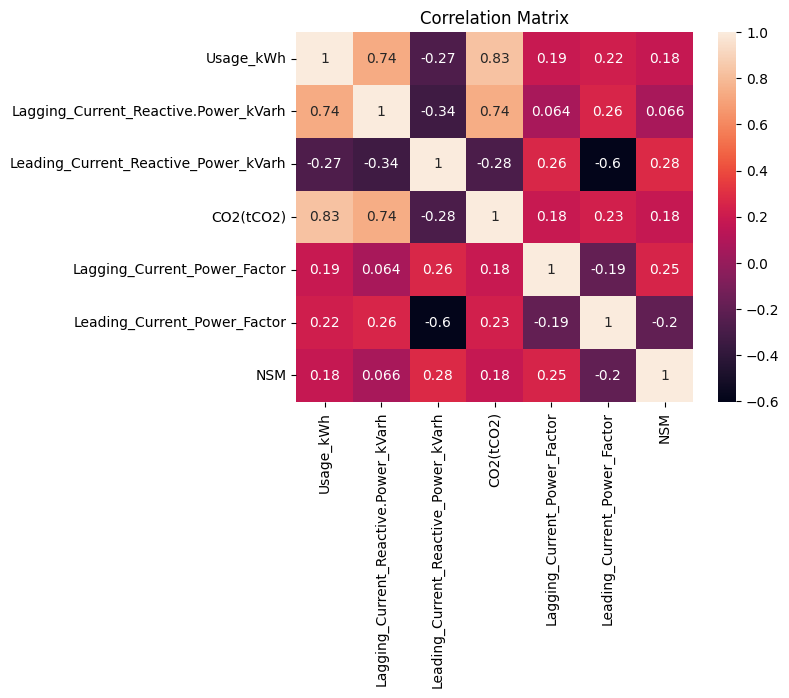

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.915268456375839
Precision: 0.9261958394410924
Recall: 0.915268456375839
F1 Score: 0.9173090710276249
Accuracy: 0.915268456375839
Precision: 0.9261958394410924
Recall: 0.915268456375839
F1 Score: 0.9173090710276249


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/load_data.csv')

# Convert 'Date' column to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

sns.countplot(x='Load_Type', data=data)
plt.title('Distribution of Load Types')
plt.show()

#  correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#  Feature engineering

data['Month'] = data['Date_Time'].dt.month
data['Day'] = data['Date_Time'].dt.day
data['DayOfWeek'] = data['Date_Time'].dt.dayofweek
data['Hour'] = data['Date_Time'].dt.hour


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

# Determine the last month's date
last_month_date = data['Date_Time'].max().replace(day=1)

# Split data into train and test sets based on the last month's date
train_data = data[data['Date_Time'] < last_month_date]
test_data = data[data['Date_Time'] >= last_month_date]


X_train = train_data.drop(columns=['Load_Type'])
y_train = train_data['Load_Type']
X_test = test_data.drop(columns=['Load_Type'])
y_test = test_data['Load_Type']
# Extract date-related features
X_train['Year'] = X_train['Date_Time'].dt.year
X_train['Month'] = X_train['Date_Time'].dt.month
X_train['Day'] = X_train['Date_Time'].dt.day
X_train['Hour'] = X_train['Date_Time'].dt.hour

# Drop the original 'Date_Time' column
X_train.drop(columns=['Date_Time'], inplace=True)

# Drop rows with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Adjust y_train accordingly

# Train Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Extract date-related features from 'Date_Time' column in test data
X_test['Year'] = X_test['Date_Time'].dt.year
X_test['Month'] = X_test['Date_Time'].dt.month
X_test['Day'] = X_test['Date_Time'].dt.day
X_test['Hour'] = X_test['Date_Time'].dt.hour

# Drop the original 'Date_Time' column
X_test.drop(columns=['Date_Time'], inplace=True)

# Drop rows with missing values
X_test.dropna(inplace=True)

# Make predictions
predictions = model.predict(X_test)


# Model evaluation
# Make predictions
predictions = model.predict(X_test)

# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Make predictions
predictions = model.predict(X_test_imputed)
# Drop rows with missing values from X_test
X_test.dropna(inplace=True)

# Re-index y_test to match the indices of X_test
y_test = y_test.loc[X_test.index]

# Make predictions on the preprocessed X_test
predictions = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)





In [ ]:
# Print column names
print(data.columns)


Index(['Date_Time', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type'],
      dtype='object')
